# Physics behind the Sunyaev-Zel'dovich effect

## Single electron-photon scattering

In this section, we inspect the electron-photon scattering process. At the smallest scale, the SZ effect comes from single electron-photon scatterings and as such, it is good to investigate this part a little bit.

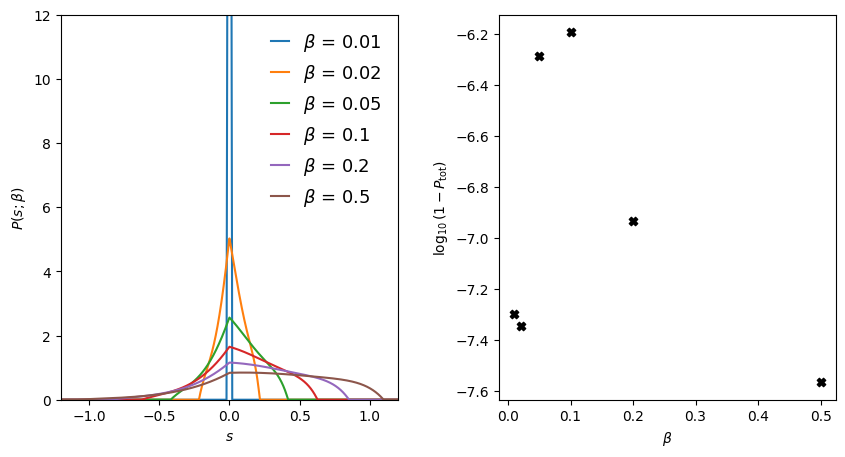

In [1]:
import numpy as np
import matplotlib.pyplot as pt

import MockSZ.SingleStats as MSingle

%matplotlib inline

num_arr = 3000                                                                                                                                               
s = np.linspace(-1.2, 1.2, num=num_arr)                                                                                                                                     
beta = np.array([0.01, 0.02, 0.05, 0.10, 0.20, 0.50])                                                                                                                                                            

amplitudes = MSingle.getPsbThomson(s, beta, num_arr) 

ds = s[1] - s[0]

check = np.sum(amplitudes * ds, axis=0)

fig, ax = pt.subplots(1,2, figsize=(10,5), gridspec_kw={"wspace":0.3})
ax[0].plot(s, amplitudes, label=[r"$\beta$ = " + x for x in beta.astype(str)])
ax[0].set_ylim(0, 12)
ax[0].set_xlim(-1.2, 1.2)

ax[0].set_ylabel(r"$P(s;\beta)$")
ax[0].set_xlabel(r"$s$")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[1].scatter(beta, np.log10(np.absolute(1 - check)), marker="X", color="black")
ax[1].set_ylabel(r"$\log_{10}(1 - P_\mathrm{tot})$")
ax[1].set_xlabel(r"$\beta$")

pt.show()


The curves in the left panel represent the scattering probability $P(s;\beta)$: the probability that an electron with velocity $\beta = v / c$ in the lab frame undergoes a scattering interaction with a photon at frequency $\nu_0$, such that the photon has a new frequency $\nu$, averaged over all photon incidence angles $\mu$. This frequency shift is expressed by the logarithmic frequency shift $s=\ln(\frac{\nu}{\nu_0})$.

Note how the scattering probability grows wider and more asymmetric for increasing $\beta$, showing a higher probability for upscattering. This is due to the higher electron velocity, which increases he probability of upscattering a photon.

As a check, we calculated the total integrated $P(s;\beta)$ over $s$, $P_\mathrm{tot}$. Because $P(s;\beta)$ is a probability, this value should be 1. In the right panel, we show the error of our calculation. It can be seen that the error is on the order of a thousandth which serves as a reassuring sanity check.

## Photon scattering from an electron population

Now that we have discussed the single electron-photon scattering scenario, it is time to discuss the case of photon scattering from an electron population. The difference is that instead of a single $\beta$, an electron population contains a whole range of $\beta$'s. This is reflected by including the electron distribution in the total probability. It should be noted that each scattering probability shown here is for a single scattering per photon only. This amounts to us setting $\tau_\mathrm{e}=1$.

We start by showing scattering probabilities for a relativistic Maxwellian distributions of electrons.

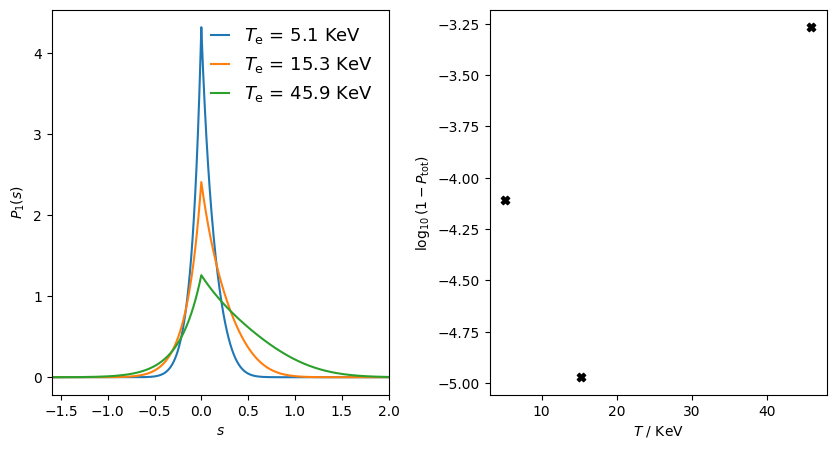

In [2]:
import MockSZ.MultiStats as MMulti
import MockSZ.Conversions as MConv

eV_arr = np.array([5.1, 15.3, 45.9]) * 1e3
Te = MConv.eV_Temp(eV_arr)

num_arr = 1000

s = np.linspace(-1.6, 2.0, num=num_arr)
ds = s[1] - s[0]
check = []

fig, ax = pt.subplots(1,2, figsize=(10,5), gridspec_kw={"wspace":0.3})
for i in range(3):
    amp = MMulti.getP1_RM(s, Te[i])
    ax[0].plot(s, amp, label=r"$T_\mathrm{e}$" + f" = {eV_arr[i] * 1e-3:.1f} KeV")
    
    check.append(np.sum(amp * ds, axis=0))
    
ax[0].set_xlim(-1.6, 2)

ax[0].set_ylabel(r"$P_1(s)$")
ax[0].set_xlabel(r"$s$")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[1].scatter(eV_arr * 1e-3, np.log10(np.absolute(1 - np.array(check))), marker="X", color="black")
ax[1].set_ylabel(r"$\log_{10}(1 - P_\mathrm{tot})$")
ax[1].set_xlabel(r"$T$ / KeV")

pt.show()

It can be seen that the higher the electron temperature $T_\mathrm{e}$, the broader the distribution becomes. This is expected from the Maxwellian distribution, which gets broader with increasing $T_\mathrm{e}$.

The second scattering probabilities we will inspect belong to a non-thermal power law distribution. This type is often used for modelling non-thermalised electron populations.

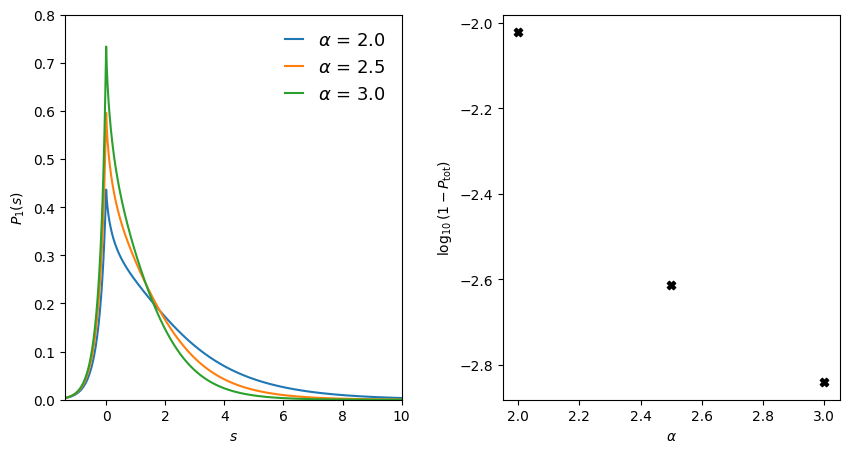

In [3]:
alpha = np.array([2, 2.5, 3])
s = np.linspace(-1.4, 10, num=num_arr)
ds = s[1] - s[0]
check = []

fig, ax = pt.subplots(1,2, figsize=(10,5), gridspec_kw={"wspace":0.3})
for i in range(3):
    amp = MMulti.getP1_PL(s, alpha[i])
    ax[0].plot(s, amp, label=r"$\alpha$" + f" = {alpha[i]:.1f}")
    check.append(np.sum(amp * ds, axis=0))
    
ax[0].set_ylim(0, 0.8)
ax[0].set_xlim(-1.4, 10)

ax[0].set_ylabel(r"$P_1(s)$")
ax[0].set_xlabel(r"$s$")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[1].scatter(alpha, np.log10(np.absolute(1 - np.array(check))), marker="X", color="black")
ax[1].set_ylabel(r"$\log_{10}(1 - P_\mathrm{tot})$")
ax[1].set_xlabel(r"$\alpha$")

pt.show()

It can immediately be seen that the high-frequency scattering tail is a lot longer compared to the thermal Maxwellian. This is due to the larger population of electrons at higher velocities, which translates into larger frequency shifts.